<a href="https://colab.research.google.com/github/solobala/DLL30/blob/main/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_0_%D0%9F%D1%80%D0%B5%D1%80%D0%B5%D0%BA%D0%B2%D0%B8%D0%B7%D0%B8%D1%82%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Манипулирование данными

Невозможно что-либо сделать, если мы не умеем манипулировать данными. Две основные операции, которые нам нужно сделать с данными - (i) получить их и (ii) обработать. Нет смысла собирать данные, если мы даже не знаем, как их хранить, поэтому давайте сначала поработаем с синтетическими данными. Мы начнем с torch.tensor. Это основной инструмент для хранения и преобразования данных в torch. Если вы раньше работали с NumPy, вы заметите, что он по своей конструкции очень похож на многомерный массив NumPy. Тем не менее, он даёт несколько ключевых преимуществ. Во-первых, torch.tensor поддерживает асинхронные вычисления на CPU и GPU. Во-вторых, он обеспечивает поддержку автоматического дифференцирования.

Начнем с импорта torch

In [57]:
import torch

Tensor - это массив (возможно, многомерный) числовых значений. Tensor с одной осью называется (в математике) вектором, с двумя - матрицей. Для массивов с более чем двумя осями нет специальных имен, их называют просто тензорами.
Самый простой объект, который мы можем создать, - это вектор. Для начала мы можем использовать arange для создания вектора строки с 12 последовательными целыми числами.

In [58]:
x = torch.arange(12) # Создание тензора
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [59]:
xx = torch.Tensor([[x, x**2, x**3] for x in range(12)]) # Создадим 2-мерный тензор, используя значения x и списочое выражение внутри конструктора тензора
xx

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 1.0000e+00, 1.0000e+00],
        [2.0000e+00, 4.0000e+00, 8.0000e+00],
        [3.0000e+00, 9.0000e+00, 2.7000e+01],
        [4.0000e+00, 1.6000e+01, 6.4000e+01],
        [5.0000e+00, 2.5000e+01, 1.2500e+02],
        [6.0000e+00, 3.6000e+01, 2.1600e+02],
        [7.0000e+00, 4.9000e+01, 3.4300e+02],
        [8.0000e+00, 6.4000e+01, 5.1200e+02],
        [9.0000e+00, 8.1000e+01, 7.2900e+02],
        [1.0000e+01, 1.0000e+02, 1.0000e+03],
        [1.1000e+01, 1.2100e+02, 1.3310e+03]])

In [60]:
torch.Tensor([1]) # Это тензор-скаляр из одного числа

tensor([1.])

Мы можем получить форму экземпляра tensor через свойство shape.

In [61]:
x.shape # просмотр формы

torch.Size([12])

In [62]:
xx.shape

torch.Size([12, 3])

Узнать расположен ли он на gpu или cpu можно через специальный аттрибут - device

In [63]:
x.device

device(type='cpu')

Мы используем функцию view, чтобы изменить форму одного (возможно многомерного) массива на другой, который содержит такое же количество элементов. Например, мы можем преобразовать форму нашего векторного вектора x в (3, 4), который содержит те же значения, но интерпретирует их как матрицу, содержащую 3 строки и 4 столбца. Обратите внимание, что, хотя форма изменилась, элементы в x не изменились. Причем количество элементов осталось прежним.

In [64]:
x.view((3,4))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Указывать каждое измерение вручную достаточно утомительно. К счастью, torch может автоматически выводить одно измерение, учитывая другие. Мы можем указать -1 для измерения, которое мы хотели бы, чтобы torch автоматически выводил. В нашем случае вместо x.view((3, 4)) мы могли бы использовать x.view ((- 1, 4)) или x.view((3, -1)).

In [65]:
x.view((-1, 4))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Другие две полезные функции - zeros и ones. Они создают массивы из всех нулей и всех единиц. Они принимают форму создаваемого тензора в качестве параметра

In [66]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [67]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

Конечно же, можно создать тензор явно, указав все значения

In [68]:
torch.tensor([[1,2,3], [4,5,6]])

tensor([[1, 2, 3],
        [4, 5, 6]])

Иногда бывает полезно создать массив, заполненный случайными значениями. Для этого используются функции torch.rand и torch.randn. Первое использует равномерное распределение, второе - нормальное

In [69]:
torch.rand((2,3,4))

tensor([[[0.7483, 0.6469, 0.2351, 0.4437],
         [0.2117, 0.3338, 0.0092, 0.9384],
         [0.0632, 0.3311, 0.3422, 0.0531]],

        [[0.9821, 0.4366, 0.3788, 0.5974],
         [0.3864, 0.0301, 0.5966, 0.5542],
         [0.0684, 0.8990, 0.9508, 0.6845]]])

In [70]:
torch.randn((2,3,4))

tensor([[[ 0.8141,  1.5611, -0.4166,  1.5084],
         [-0.8725,  0.6810, -0.7925,  1.2127],
         [ 1.0403,  1.6717,  0.6627, -0.0623]],

        [[ 0.1824,  0.4294, -0.0049, -1.4684],
         [-1.3111,  0.7513, -0.4269,  0.2614],
         [ 0.2345, -0.2188, -1.3097, -0.8727]]])

## Операции

Обычно мы хотим не только создавать массивы, но и применять к ним функции. Самые простые и полезные из них - это поэлементные функции. Они работают, выполняя одну скалярную операцию над соответствующими элементами двух массивов.

In [71]:
x = torch.tensor([1., 2., 4., 8.])

In [72]:

y = torch.ones_like(x) * 2
print('x =', x)
print('y =', y)
print('x + y', x + y)
print('x - y', x - y)
print('x * y', x * y)
print('x / y', x / y)

x = tensor([1., 2., 4., 8.])
y = tensor([2., 2., 2., 2.])
x + y tensor([ 3.,  4.,  6., 10.])
x - y tensor([-1.,  0.,  2.,  6.])
x * y tensor([ 2.,  4.,  8., 16.])
x / y tensor([0.5000, 1.0000, 2.0000, 4.0000])


Еще больше операций может быть выполненно поэлементно. Например - операции exp

In [73]:
x.exp()

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

В дополнение к поэлементным вычислениям, мы также можем выполнять матричные операции. Например, матричное умножение. Для этого используется функция mm.

In [74]:
x = torch.arange(12).reshape((3,4))
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [75]:
y = torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
y

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [76]:
y.T

tensor([[2, 1, 4],
        [1, 2, 3],
        [4, 3, 2],
        [3, 4, 1]])

In [77]:
torch.mm(x, y.T)

tensor([[ 18,  20,  10],
        [ 58,  60,  50],
        [ 98, 100,  90]])

In [129]:
x

tensor([[12, 12, 12, 12],
        [12, 12, 12, 12],
        [ 8,  9, 10, 11]])

In [132]:
# произведение тензора на вектор
f = torch.tensor([1,2,3,4])


In [133]:
torch.mv(x,f)

tensor([120, 120, 100])

Мы также можем объединить несколько тензоров. Для этого нам нужно указать, по какому измерению производить объединение. В приведенном ниже примере объединяются две матрицы по измерению 0 (по строкам) и измерению 1 (по столбцам) соответственно.

In [78]:
torch.cat((x, y), axis=0)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [ 2,  1,  4,  3],
        [ 1,  2,  3,  4],
        [ 4,  3,  2,  1]])

In [79]:
torch.cat((x, y), dim=0)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [ 2,  1,  4,  3],
        [ 1,  2,  3,  4],
        [ 4,  3,  2,  1]])

In [80]:
torch.cat((x, y), dim=1)

tensor([[ 0,  1,  2,  3,  2,  1,  4,  3],
        [ 4,  5,  6,  7,  1,  2,  3,  4],
        [ 8,  9, 10, 11,  4,  3,  2,  1]])

Для получения булевых тензоров можно использовать булевы операторы. Например, можно сравнить два тензора при помощи оператора ==

In [81]:
x == y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [82]:
(x == y).int()

tensor([[0, 1, 0, 1],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)

Суммирование всех элементов тезора дает тензор с одним элементом.

In [83]:
x.sum()

tensor(66)

Мы можем преобразовать результат в скаляр в Python, используя функцию item

In [84]:
x.sum().item()

66

In [85]:
x.sum(dim=1) # суммирование по столбцам

tensor([ 6, 22, 38])

In [86]:
x.sum(dim=1).shape

torch.Size([3])

In [87]:
x.sum(dim=0) # суммирование по строкам

tensor([12, 15, 18, 21])

In [88]:
# Если нужно сохранить размерность исходного тензорас и после суммирования
x.sum(dim=1, keepdim=True)

tensor([[ 6],
        [22],
        [38]])

In [89]:
x.sum(dim=1, keepdim=True).shape

torch.Size([3, 1])

## Преобразование типов

In [90]:
x.dtype # показывает тип элементов тензора

torch.int64

In [91]:
x.double()

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]], dtype=torch.float64)

In [92]:
# Универсальная ф-я преобразования типа
x.type('torch.DoubleTensor')

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]], dtype=torch.float64)

## Изменение размерности

In [93]:
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [94]:
x.shape

torch.Size([3, 4])

In [95]:
x.unsqueeze(1).shape # ДОбавили ось на позицию 1

torch.Size([3, 1, 4])

In [96]:
x.unsqueeze(1) # в x это не сохраняется"!

tensor([[[ 0,  1,  2,  3]],

        [[ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11]]])

In [97]:
x.unsqueeze(2).shape

torch.Size([3, 4, 1])

In [98]:
x.unsqueeze(2)

tensor([[[ 0],
         [ 1],
         [ 2],
         [ 3]],

        [[ 4],
         [ 5],
         [ 6],
         [ 7]],

        [[ 8],
         [ 9],
         [10],
         [11]]])

In [99]:
x.unsqueeze(-1) # то же самое, новое измерение добавили на последнюю позицию

tensor([[[ 0],
         [ 1],
         [ 2],
         [ 3]],

        [[ 4],
         [ 5],
         [ 6],
         [ 7]],

        [[ 8],
         [ 9],
         [10],
         [11]]])

In [100]:
x1 = x.unsqueeze(1)
x1

tensor([[[ 0,  1,  2,  3]],

        [[ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11]]])

In [101]:
x1.shape

torch.Size([3, 1, 4])

In [102]:
x.unsqueeze(1).unsqueeze(2).squeeze().shape # из двумерного тензора делаем 4 мерный, а затем с помощью squeeze удаляем все добавленные измерения)

torch.Size([3, 4])

## Транспонирование

In [103]:
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [104]:
x.T

tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]])

In [105]:
x.permute(1,0) # аналог транспонирования - строки и столбцы поменяются местами

tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]])

In [106]:
x.permute(0,1) # Это исходный тензор - на нулевой позиции остается нулевая. на первой - первая

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [107]:
xx = torch.rand((2,3,4))
xx

tensor([[[0.5959, 0.3697, 0.6918, 0.3951],
         [0.1432, 0.8295, 0.7295, 0.3693],
         [0.0314, 0.7918, 0.5879, 0.6237]],

        [[0.4779, 0.7800, 0.1805, 0.3325],
         [0.9448, 0.7844, 0.5727, 0.9648],
         [0.1521, 0.2048, 0.0773, 0.7122]]])

In [56]:
xx.permute(1,2,0)

tensor([[[0.7506, 0.7457],
         [0.1544, 0.0595],
         [0.5758, 0.2261],
         [0.7949, 0.1897]],

        [[0.0694, 0.1942],
         [0.3563, 0.0419],
         [0.8296, 0.5691],
         [0.6039, 0.0355]],

        [[0.9891, 0.3900],
         [0.6140, 0.4784],
         [0.5688, 0.3844],
         [0.6025, 0.1902]]])

## Broadcast

Выполнять операции можно не только с тензорами одинакового размера, но и разного. Когда их формы различаются, запускается механизм broadcast. Сначала элементы копируются соответствующим образом, чтобы два тензора имели одинаковую форму, а затем операции выполняются поэлементно.

In [114]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b # Получили вектор-строку и вектор-столбец

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

Поскольку a и b являются матрицами (3x1) и (1x2) соответственно, их формы не совпадают. Torch решает эту проблему путем broadcast'а значений обеих матриц в большую (3x2) матрицу следующим образом: для матрицы a он реплицирует столбцы, для матрицы b он реплицирует строки. После чего запускается операция сложения

In [113]:
# При broadcast происходит как будто эти операции с a И затем сложениеиравных по размеру тензоров
# a= torch.Tensor([[0,0], [1,1],[2,2]])
# b= torch.Tensor([[0,1], [0,1],[0,1]])
# (a+b).int()

tensor([[0, 1],
        [1, 2],
        [2, 3]], dtype=torch.int32)

In [115]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

## Индексирование

Как и в любом другом массиве Python, элементы в тензоре могут быть доступны по их индексу. По традиции первый элемент имеет индекс 0, а диапазоны указываются для включения первого, но не последнего элемента. По этой логике `1: 3` выбирает второй и третий элемент из тензора

In [116]:
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [117]:
x[1:3]

tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Мы так же можем изменять значения в тензоре

In [118]:
x[1, 2] = 9
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  9,  7],
        [ 8,  9, 10, 11]])

Если мы хотим присвоить нескольким элементам одно и то же значение, мы просто индексируем все из них (при помощи оператора `:`), а затем присваиваем им значение. Например, `[0:2,:]` обращается к первой и второй строчкам.

In [119]:
x[0:2, :] = 12
x

tensor([[12, 12, 12, 12],
        [12, 12, 12, 12],
        [ 8,  9, 10, 11]])

## В numpy и назад

In [134]:
x.numpy()

array([[12, 12, 12, 12],
       [12, 12, 12, 12],
       [ 8,  9, 10, 11]])

In [135]:
y = torch.tensor(x.numpy())
y

tensor([[12, 12, 12, 12],
        [12, 12, 12, 12],
        [ 8,  9, 10, 11]])

## Немного практики

1. Матрица B называется обратной к матрице A, если A*B = I (где I - единичная матрица). Найдите (перебором) обратную к матрице A = ((1,1), (1,2))


In [120]:
A = torch.tensor(((1.,1.), (1.,2.)))
B = torch.tensor(((2,-1.), (-1,1.)))
torch.mm(A, B)

tensor([[1., 0.],
        [0., 1.]])

2. Примените оператор преобразования A = ((1,2), (3,4)) к квадрату с вершинами в точках (1,1), (1,-1), (-1, -1), (-1, 1) и найдите расстояния между получившимися вершинами

In [137]:
l = [(1,1), (1,-1), (-1, -1), (-1, 1)]
A  = torch.tensor( ((1,2), (3,4)))
for i  in l:
  t = torch.tensor(i)
  print(torch.mv(A, t))


tensor([3, 7])
tensor([-1, -1])
tensor([-3, -7])
tensor([1, 1])


!Расстояние между вершинами не нашли!

Вероятности

In [138]:
torch.rand(10) # Равномерное распределение

tensor([0.5944, 0.3132, 0.5505, 0.5339, 0.3939, 0.7689, 0.6407, 0.1493, 0.8968,
        0.7833])

In [139]:
torch.randn(10) # Нормальное распределение

tensor([ 0.1815, -0.0990, -0.7541, -1.3529,  1.2187,  2.1837, -0.5929, -0.1742,
         0.8228,  2.4270])

In [142]:
torch.randint(0,10,(10,)) # Равнмерное распределение на целых числах - указываем начальную и конечную границы и размерность тензора, который хотим получить

tensor([0, 1, 2, 0, 3, 1, 2, 6, 6, 7])

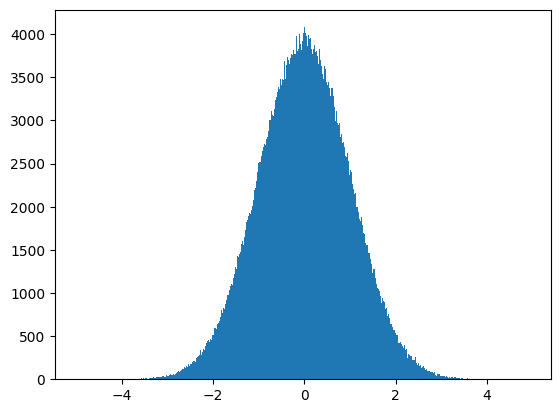

In [143]:
from matplotlib import pyplot as plt
_ = plt.hist(torch.randn(1000000), bins=1000)

In [ ]:
for i1 in (0., 0.5, 1.):
    for i2 in (0., 0.5, 1.):
        for i3 in (0., 0.5, 1.):
            for i4 in (0., 0.5, 1.):
                yy = torch.tensor([[i1,i2], [i3,i4]])
                xx_tmp = xx * yy
                if torch.all(torch.eq(xx_tmp, xx_)):
                  print(yy)

## Детектор спама

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip

--2020-02-14 23:43:55--  https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203415 (199K) [application/x-httpd-php]
Saving to: ‘smsspamcollection.zip’

smsspamcollection.z 100%[===================>] 198.65K   299KB/s    in 0.7s    

2020-02-14 23:43:56 (299 KB/s) - ‘smsspamcollection.zip’ saved [203415/203415]



In [ ]:
!unzip smsspamcollection.zip

Archive:  smsspamcollection.zip
  inflating: SMSSpamCollection       
  inflating: readme                  


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_table('SMSSpamCollection', sep='\t', header=None,names=['label', 'sms_message'])

df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['label'] = df.label.map({'ham':0,'spam':1})

df.shape

(5572, 2)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['sms_message'],
                                                    df['label'],
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vector = CountVectorizer()
training_data = count_vector.fit_transform(X_train).toarray()
testing_data = count_vector.transform(X_test).toarray()

In [ ]:
training_tensor = torch.Tensor(training_data)
testing_tensor = torch.Tensor(testing_data)

In [ ]:
training_tensor.shape

torch.Size([4179, 7456])

$P(w) = \frac{Количество\ вхождений\ слова\ w\ в\ датасет}{Количество\ слов\ в\ датасете"}$

In [ ]:
training_tensor.sum()

tensor(59839.)

In [ ]:
p_w = training_tensor.sum(axis=0) / training_tensor.sum()
p_w.shape

torch.Size([7456])

$P(w|spam) = \frac{Количество\ вхождений\ слова\ w\ в\ спамные сообщения}{Количество\ слов\ в\ спаме"}$

In [ ]:
spam_training_tensor = training_tensor[(y_train == 1).values]

In [ ]:
spam_training_tensor.shape

torch.Size([562, 7456])

In [ ]:
p_w_spam = spam_training_tensor.sum(axis=0) / spam_training_tensor.sum()
p_w_spam.shape

torch.Size([7456])

$P(spam) = \frac{Количество\ спама}{Количество\ сообщений"}$

In [ ]:
p_spam = (y_train == 1).values.sum() / len(y_train)
p_not_spam = (y_train == 0).values.sum() / len(y_train)

In [ ]:
p_spam

0.13448193347690834

In [ ]:
p_not_spam

0.8655180665230916

$P(spam|w)=\frac{P(w|spam)P(spam)}{P(w)}$

$P(spam|w)=\frac{P(w_1|spam)P(w_2|spam)...P(w_n|spam)P(spam)}{P(w_1)P(w_2)...P(w_n)}$

In [ ]:
test_sample = testing_tensor[0]

In [ ]:
y_test.head()

1078    0
4028    0
958     0
4642    0
4674    0
Name: label, dtype: int64

In [ ]:
df.iloc[1078]

label                                     0
sms_message    Yep, by the pretty sculpture
Name: 1078, dtype: object

In [ ]:
[test_sample != 0]

[tensor([False, False, False,  ..., False, False, False])]

In [ ]:
(test_sample * p_w_spam)[test_sample != 0]

tensor([0.0021, 0.0000, 0.0119, 0.0000])

In [ ]:
(test_sample * p_w_spam)[test_sample != 0].prod()

tensor(0.)

In [ ]:
(test_sample * p_w_spam)[test_sample != 0].prod() * p_spam

tensor(0.)

In [ ]:
((test_sample * p_w)[test_sample != 0].prod())

tensor(1.1332e-12)

In [ ]:
(test_sample * p_w_spam)[test_sample != 0].prod() * p_spam / ((test_sample * p_w)[test_sample != 0].prod())

tensor(0.)

## Вероятности

In [ ]:
# Равномерное распределение вероятности

In [ ]:
torch.rand(10)

tensor([0.6737, 0.2510, 0.0436, 0.8806, 0.8414, 0.2155, 0.7819, 0.9293, 0.9413,
        0.4566])

In [ ]:
## Нормальное распределение

In [ ]:
torch.randn(10)

tensor([-0.9420, -0.1692, -0.6964,  0.2431, -0.1955, -1.5139, -0.6033, -0.9355,
        -0.0650,  0.6315])

In [ ]:
## Равномерное на целых числах

In [ ]:
torch.randint(0, 10, (10,))

tensor([1, 6, 7, 8, 6, 2, 7, 6, 1, 6])

## Постройте график плотности для нормального распределения

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
tensor = torch.randn(1000)

(array([  6.,  51., 120., 214., 254., 188., 104.,  54.,   7.,   2.]),
 array([-2.9656153 , -2.3141658 , -1.6627164 , -1.011267  , -0.3598175 ,
         0.29163194,  0.9430814 ,  1.5945308 ,  2.2459803 ,  2.8974297 ,
         3.5488791 ], dtype=float32),
 <a list of 10 Patch objects>)

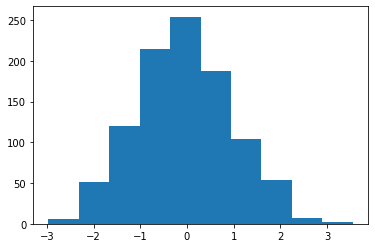

In [ ]:
plt.hist(tensor)